In [ ]:
# Versão da Linguagem Python
#from platform import python_version
#print('Versão Python:', python_version())

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [1]:
# Pacote Pingouin
# Pacote para analise estatisticas
!pip install -q -U pingouin

     |████████████████████████████████| 225kB 2.8MB/s 


In [2]:
# Imports para Web Scraping
import bs4
import csv 
import requests
from bs4 import BeautifulSoup

# Imports para manipulação, visualização e análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Versões dos pacotes usados neste jupyter notebook
#%reload_ext watermark
#%watermark --iversions

In [3]:
# Etapa 1: Carregar os dados direto do website.
website = requests.get("https://www.basketball-reference.com/leagues/NBA_2020_per_game.html")

In [4]:
# Validando a conexao com a url {200} = OK
website.status_code

200

In [5]:
# Visualizando todo o documento extraído do website
website.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" itemscope itemtype="https://schema.org/WebSite" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://d2p3bygnnzw9w3.cloudfront.net/req/202008171" />\n\n    <title>2019-20 NBA Player Stats: Per Game | Basketball-Reference.com</title>\n\n    \n    \n    <meta name="Description" content="Player stat per game averages for the 2019-20 NBA season">\n    <link rel="canonical" href="https://www.basketball-reference.com/leagues/NBA_2020_per_game.html" />\n\n<!-- include:start ="/inc/klecko_header_bbr.html_f" -->\n<!-- no:cookie fast load the css.           -->\n<script>function gup(n) {n = n.replace(/[\\[]/, \'\\\\[\').replace(/[\\]]/, \'\\\\]\'); var r = new RegExp(\'[\\\\?&]\'+n+\'=([^&#]*)\'); var re = r.exec(l

In [6]:
# Obtendo o Código HTML da Página através da biblioteca BeatufilSoap
website_html = BeautifulSoup(website.text, 'html.parser')

In [ ]:
website_html

In [8]:
dados_extraidos = website_html.find("div", {"class": "overthrow table_container"})
#dados_extraidos

In [9]:
# A partir dos dados extraidos, queremos obter o cabeçalho da tabela. Cabeçalho esse que contém os nomes das colunas.
# Esses dados se encontram na TAG THEAD
header = dados_extraidos.find("thead")
header_elements = header.find_all("th")
# Para cada registro na lista, extraía somente os texto, que é onde está o nome das colunas. [1:] para ignorar a coluna Rk
header_elements = [head.text for head in header_elements[1:]]

In [10]:
# Salvando todo o resultado da extração em uma lista
full_data = []
full_data.append(header_elements)
full_data

[['Player',
  'Pos',
  'Age',
  'Tm',
  'G',
  'GS',
  'MP',
  'FG',
  'FGA',
  'FG%',
  '3P',
  '3PA',
  '3P%',
  '2P',
  '2PA',
  '2P%',
  'eFG%',
  'FT',
  'FTA',
  'FT%',
  'ORB',
  'DRB',
  'TRB',
  'AST',
  'STL',
  'BLK',
  'TOV',
  'PF',
  'PTS']]

In [11]:
# Obtendo as informações contidas nos dados extraídos.
Line_elements = dados_extraidos.find_all("tr", {"class": "full_table"})

In [12]:
# Extrai somente as informações da tag td e obtem o texto.  No fim, adiciona o resultado dentro de uma lista.
full_elements = []
for row in Line_elements:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    full_elements.append(data_elements)

In [13]:
# Transforma as 2 listas em dataframe
df = pd.DataFrame(full_data + full_elements)
# Renomeia o cabeçalho para os registros da posição 0
df = df.rename(columns=df.iloc[0])
# Remove a linha de posição 0
df = df.drop(df.index[0])

In [14]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/scraping_nba.csv', index=False, header=True)

In [15]:
# Carrega o arquivo csv com o conteúdo do web scraping
df_nba = pd.read_csv('/content/drive/My Drive/Colab Notebooks/scraping_nba.csv')

In [16]:
df_nba.shape

(529, 29)

In [17]:
df_nba.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,NaN,0.5,1.0,0.500,0.500,0.0,0.0,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


Dicionário de Dados (conforme mostrado na fonte de dados):

Rk -- Rank

Pos -- Position

Age -- Player's age on February 1 of the season
Tm -- Team

G -- Games

GS -- Games Started

MP -- Minutes Played Per Game

FG -- Field Goals Per Game

FGA -- Field Goal Attempts Per Game

FG% -- Field Goal Percentage

3P -- 3-Point Field Goals Per Game

3PA -- 3-Point Field Goal Attempts Per Game

3P% -- 3-Point Field Goal Percentage

2P -- 2-Point Field Goals Per Game

2PA -- 2-Point Field Goal Attempts Per Game

2P% -- 2-Point Field Goal Percentage

eFG% -- Effective Field Goal Percentage

This statistic adjusts for the fact that a 3-point field goal is worth one 
more point than a 2-point field goal.

FT -- Free Throws Per Game

FTA -- Free Throw Attempts Per Game

FT% -- Free Throw Percentage

ORB -- Offensive Rebounds Per Game

DRB -- Defensive Rebounds Per Game

TRB -- Total Rebounds Per Game

AST -- Assists Per Game

STL -- Steals Per Game

BLK -- Blocks Per Game

TOV -- Turnovers Per Game

PF -- Personal Fouls Per Game

PTS -- Points Per Game

In [18]:
#media de idade
df_nba['Age'].mean()

25.561436672967865

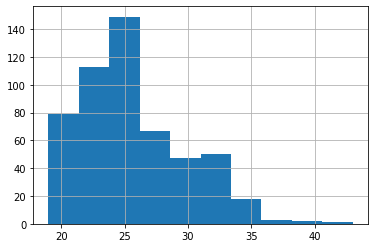

In [19]:
#distribuição da variavel idade
df_nba['Age'].hist()

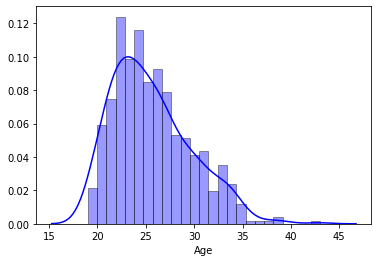

In [20]:
# hist = Plota a distribuição do histograma
# kde = plota a linha de densidade estimada
# rug = plota um gráfico de linhas ao pé do eixo de suporte
# hist_kwd = cor da divisão das linhas no histograma
ax = sns.distplot(df_nba['Age'], hist = True, kde = True, rug = False, color = 'blue', bins = 25, hist_kws = {'edgecolor':'black'})
plt.show()

In [21]:
# Teste de normalidade com Pingouin
# Valor alpha default: 0.05
pg.normality(df_nba['Age'])

,W,pval,normal
Age,0.948836,1.474959e-12,False


In [ ]:
# reset_index é utilizado para que a coluna Player não seja categorizada como INDEX do resultado.
df_nba_pts = df_nba.groupby(['Player'])['PTS'].sum().reset_index()
df_nba_pts

,Player,PTS
0,Aaron Gordon,14.4
1,Aaron Holiday,9.7
2,Abdel Nader,6.1
3,Adam Mokoka,2.9
4,Admiral Schofield,3.0
...,...,...
520,Zach LaVine,25.5
521,Zach Norvell,2.0
522,Zhaire Smith,1.1
523,Zion Williamson,22.3


In [ ]:
# Retorna o TOP 10 maiores registros na coluna PTS
df_nba_pts.nlargest(10, 'PTS')

,Player,PTS
219,James Harden,34.3
42,Bradley Beal,30.5
177,Giannis Antetokounmpo,29.6
484,Trae Young,29.6
331,Luka Dončić,29.0
91,Damian Lillard,28.8
318,Kyrie Irving,27.4
435,Russell Westbrook,27.4
288,Kawhi Leonard,26.8
23,Anthony Davis,26.5


In [ ]:
df_nba_35Age = df_nba[(df_nba['Age'] >= 35) & (df_nba['GS'] > 0)]
df_nba_35Age[['Player','Age']]

,Player,Age
14,Carmelo Anthony,35
24,J.J. Barea,35
92,Tyson Chandler,37
167,Marc Gasol,35
247,LeBron James,35
414,J.J. Redick,35


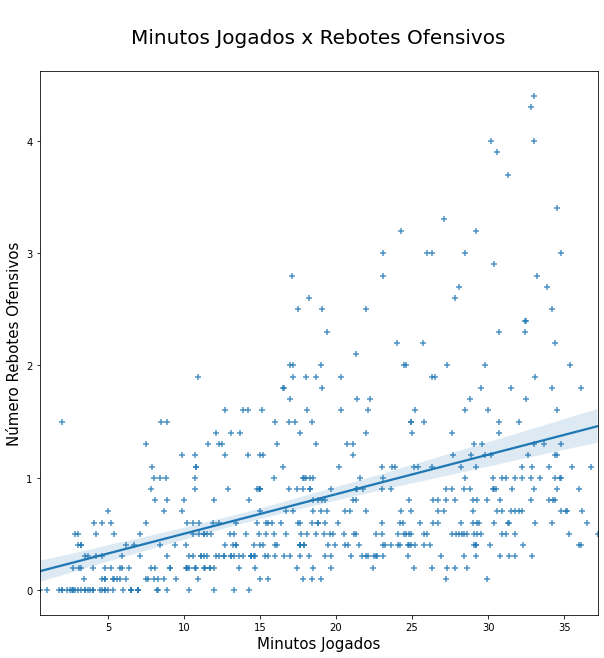

In [ ]:
plt.figure(figsize=[10,10])
plt.title('\nMinutos Jogados x Rebotes Ofensivos\n', fontsize = 20)
ax = sns.regplot(x = df_nba['MP'], y = df_nba['ORB'], marker = '+')
ax.set_xlabel('Minutos Jogados', fontsize=15)
ax.set_ylabel('Número Rebotes Ofensivos', fontsize=15);

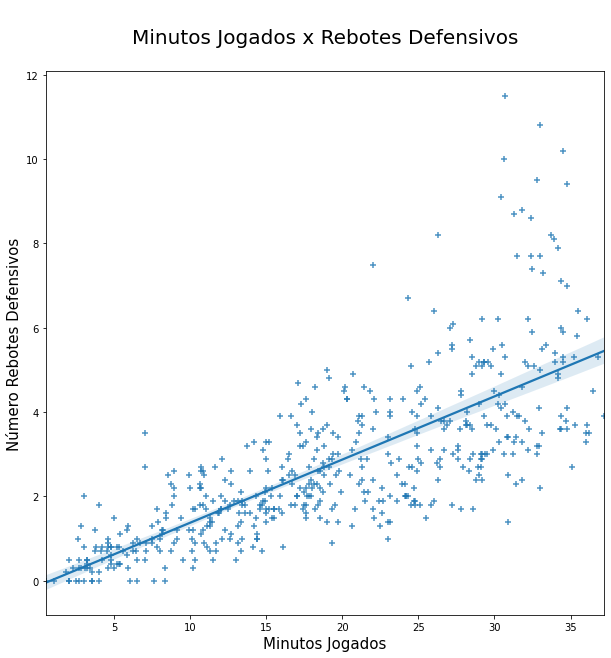

In [ ]:
plt.figure(figsize=[10,10])
plt.title('\nMinutos Jogados x Rebotes Defensivos\n', fontsize = 20)
ax = sns.regplot(x = df_nba['MP'], y = df_nba['DRB'], marker = '+')
ax.set_xlabel('Minutos Jogados', fontsize=15)
ax.set_ylabel('Número Rebotes Defensivos', fontsize=15);

In [ ]:
# Obtendo somente os dados de tempo jogado e rebote ofensivo 
df_preditcion = df_nba[['MP', 'ORB']]
df_preditcion

,MP,ORB
0,27.1,3.3
1,34.2,2.5
2,33.1,1.9
3,12.0,0.2
4,17.8,0.1
...,...,...
520,35.3,0.5
521,23.1,2.8
522,2.0,1.5
523,10.0,0.8


In [ ]:
# Importação dos pocates para dividir os dados em treino e teste, pacote do modelo de regressão e o pacote para avaliar o resultado.
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
df_preditcion.shape

(525, 2)

In [ ]:
(df_preditcion['MP'].values).shape

(525,)

In [ ]:
# Necessário aplicar a conversão utilizando o reshape para que as informações sejam representadas com 2 dimensões (linhaxcoluna)
x = df_preditcion['MP'].values.reshape(-1, 1)
target = df_preditcion['ORB'].values

In [ ]:
x.shape

(525, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
# flatten() : retorna os dados em uma única dimensão (semelhante ao ravel)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.6,0.300547
1,1.8,1.309715
2,0.6,0.562059
3,0.2,0.914094
4,0.5,1.145432
...,...,...
153,1.7,0.907389
154,1.6,0.639171
155,3.3,1.071672
156,1.2,1.316421


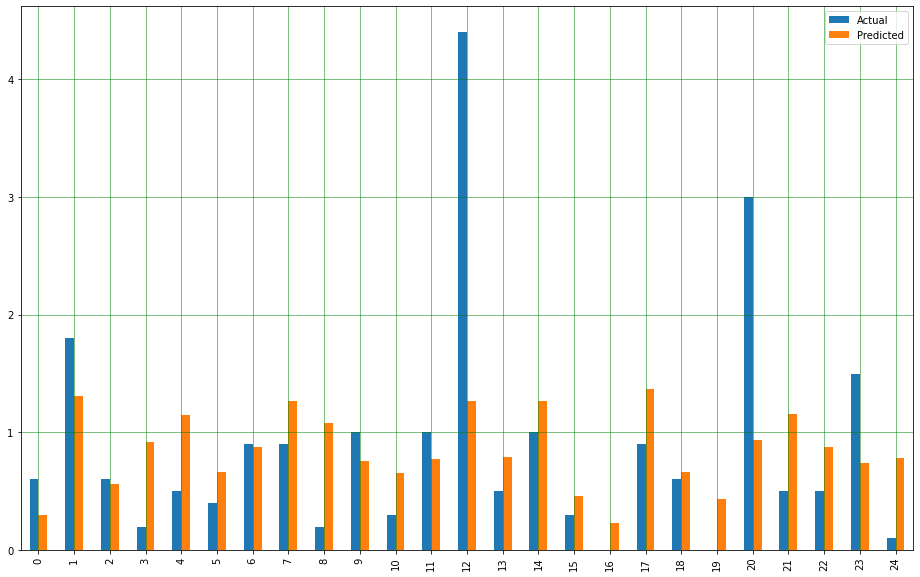

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5160523205283777
Mean Squared Error: 0.5154793278401734
Root Mean Squared Error: 0.71796889057965
